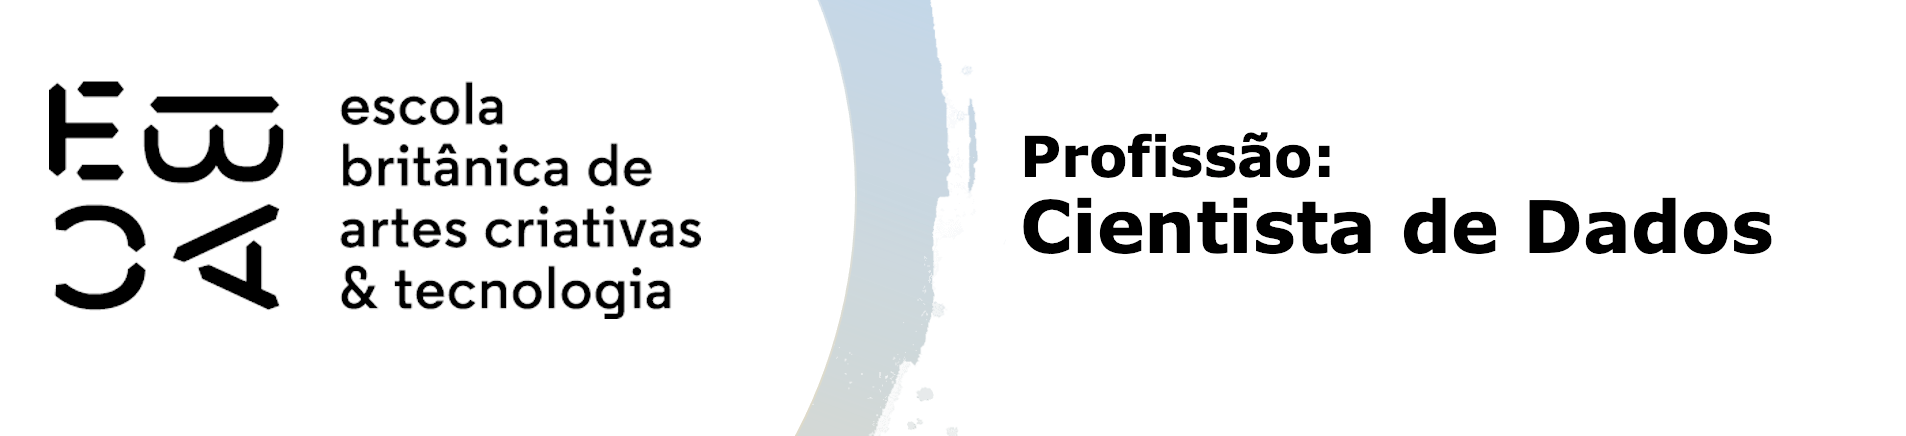

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [2]:
# Selecionando as variáveis quantitativas da base de pinguins
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng_num = peng.select_dtypes(include='number')

In [3]:
# Eliminando valores faltantes
peng_num = peng_num.dropna()

In [4]:
# Visualizando os dados
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
id,,,,
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [5]:
# Padronizando as variáveis para média zero e desvio padrão 1
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

In [6]:
# Fazendo um agrupamento hierárquico dividindo essa base em 3 grupos
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [7]:
# Criando a variável 'grupo' e visualizando os dados
peng_num['grupo'] = clus.labels_
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1


In [8]:
# Voltando a ordem de 'id' da base original
peng = peng.merge(peng_num['grupo'], how='left', on='id')
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0


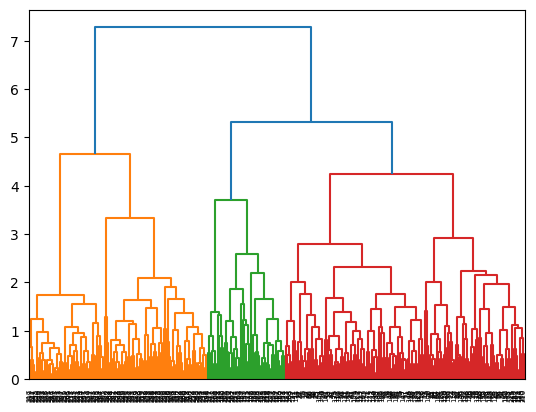

In [9]:
# Fazendo o Dendrograma
dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [10]:
# Verificando quantos pinguins de cada espécie há em cada grupo
df_cross = pd.crosstab(peng['species'], peng['grupo'])
df_cross

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


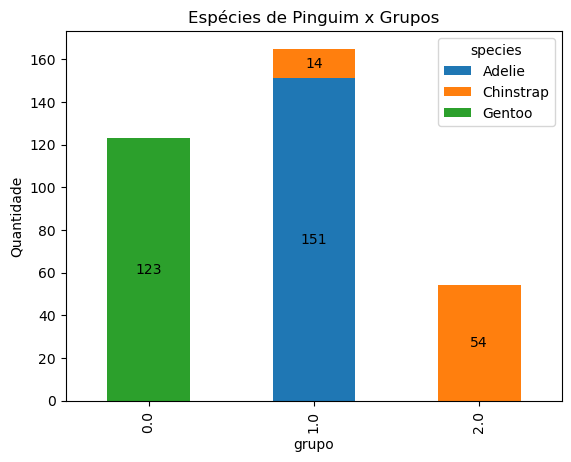

In [11]:
# Visualização gráfica
ax = df_cross.T.plot(kind='bar', stacked=True)
plt.ylabel('Quantidade')
plt.title('Espécies de Pinguim x Grupos')
# Adicionar valores
for i in ax.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy()
    if height != 0:
        ax.annotate(f'{height:.0f}', (x + width/2, y + height/2), ha='center', va='center')

## 3) Alterando o agrupamento

O Dendrogarma sugere que podem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [12]:
# Fazendo um agrupamento hierárquico dividindo essa base em 5 grupos
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=5)
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [13]:
# Criando a variável 'grupo_5' e visualizando os dados
peng_num['grupo_5'] = clus.labels_
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo,grupo_5
id,,,,,,
0,39.1,18.7,181.0,3750.0,1,4
1,39.5,17.4,186.0,3800.0,1,4
2,40.3,18.0,195.0,3250.0,1,4
4,36.7,19.3,193.0,3450.0,1,4
5,39.3,20.6,190.0,3650.0,1,2


In [14]:
# Voltando a ordem de 'id' da base original
peng = peng.merge(peng_num['grupo_5'], how='left', on='id')
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo,grupo_5
id,,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,4.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,4.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,4.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,4.0


In [15]:
# Verificando quantos pinguins de cada espécie há em cada grupo
df_cross_5 = pd.crosstab(peng['species'], peng['grupo_5'])
df_cross_5

grupo_5,0.0,1.0,2.0,3.0,4.0
species,,,,,
Adelie,0,0,60,0,91
Chinstrap,54,0,9,0,5
Gentoo,0,71,0,52,0


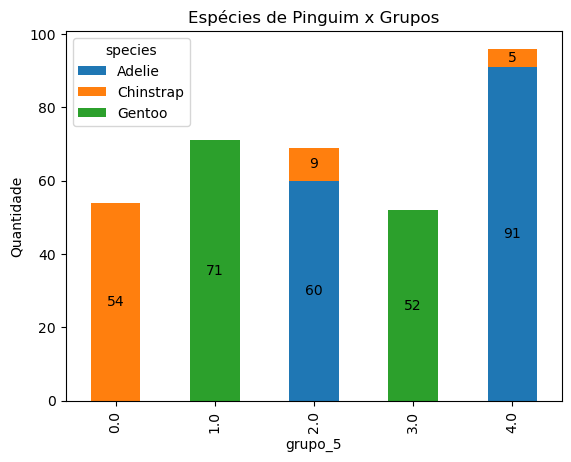

In [16]:
# Visualização gráfica
ax = df_cross_5.T.plot(kind='bar', stacked=True)
plt.ylabel('Quantidade')
plt.title('Espécies de Pinguim x Grupos')
# Adicionar valores
for i in ax.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy()
    if height != 0:
        ax.annotate(f'{height:.0f}', (x + width/2, y + height/2), ha='center', va='center')

In [17]:
# Verificando quantos pinguins de cada espécie machos e fêmeas há em cada grupo
df_cross_sex = pd.crosstab(index=[peng['species'], peng['sex']], 
                       columns=peng['grupo_5'], values=peng['sex'], 
                       aggfunc='count').fillna(0).astype(int)
df_cross_sex 

grupo_5           0.0  1.0  2.0  3.0  4.0
species   sex                            
Adelie    Female    0    0    4    0   69
          Male      0    0   55    0   18
Chinstrap Female   20    0    9    0    5
          Male     34    0    0    0    0
Gentoo    Female    0    9    0   49    0
          Male      0   61    0    0    0

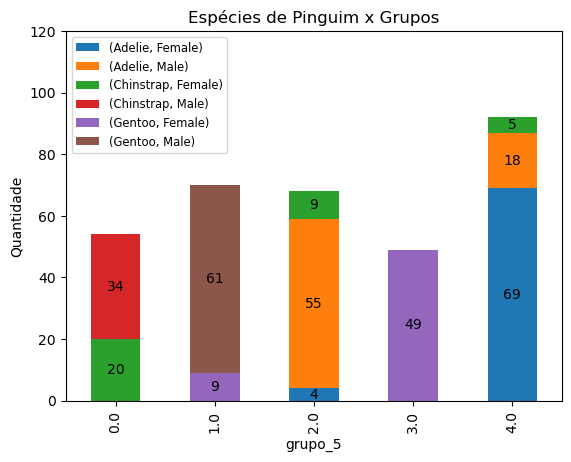

In [18]:
# Visualização gráfica
ax = df_cross_sex.T.plot(kind='bar', stacked=True)
ax.set_ylim(0, 120)
plt.ylabel('Quantidade')
plt.title('Espécies de Pinguim x Grupos')
plt.legend(fontsize='small')
# Adicionar valores
for i in ax.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy()
    if height != 0:
        ax.annotate(f'{height:.0f}', (x + width/2, y + height/2), ha='center', va='center')

#### Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?
- Os 03 (três) primeiros grupos apresentam predominância dos pinguins do sexo masculino, enquanto os 02 (dois) últimos apresentam a predominância dos pinguins do sexo feminino.